In [1]:
import boolsim
from colomoto.minibn import BooleanNetwork
from colomoto_jupyter import tabulate # for display
import os
import pandas as pd
from multiprocessing import Pool
from tqdm import tqdm

# For loop to calculate the attractors for each models

In this part of the script, we test the for loop to calculate the attractors for each model file
We can perform two different methods to calculate vector of attractors for each model

1. Average value for attractors

In [2]:
# Define function to process each model file
def process_model_file(file):
    bn = BooleanNetwork.load(file)
    a = boolsim.attractors(bn, update_mode='asynchronous')
    model = tabulate(a).mean()
    return model

In [3]:
models_path = '/home/spankaew/Git/BooleanBenchmark/models/test_bonesis/'

# Define models path
os.chdir(models_path)
model_files = os.listdir(models_path)
model_logic = pd.DataFrame()

# protect the entry point
if __name__ == '__main__':
    # Load models
    # Process all model files in parallel with limited number of cores
    num_cores = 10  # specify the number of cores you want to use
    with Pool(processes=num_cores) as pool:
        results = list(tqdm(pool.imap(process_model_file, model_files), total=len(model_files)))

    # Concatenate results into a single DataFrame
    print('Concatenate results into matrix')
    for model in tqdm(results):
        model_logic = pd.concat([model_logic, model], axis=1, ignore_index=False)

    # Create model names
    model_names = [file.replace('.bnet', '') for file in model_files]
    model_logic.columns = model_names

    # Deleted unused variables
    del(model, model_files, model_names)

100%|██████████| 88/88 [00:02<00:00, 39.32it/s]


Concatenate results into matrix


100%|██████████| 88/88 [00:00<00:00, 1232.12it/s]


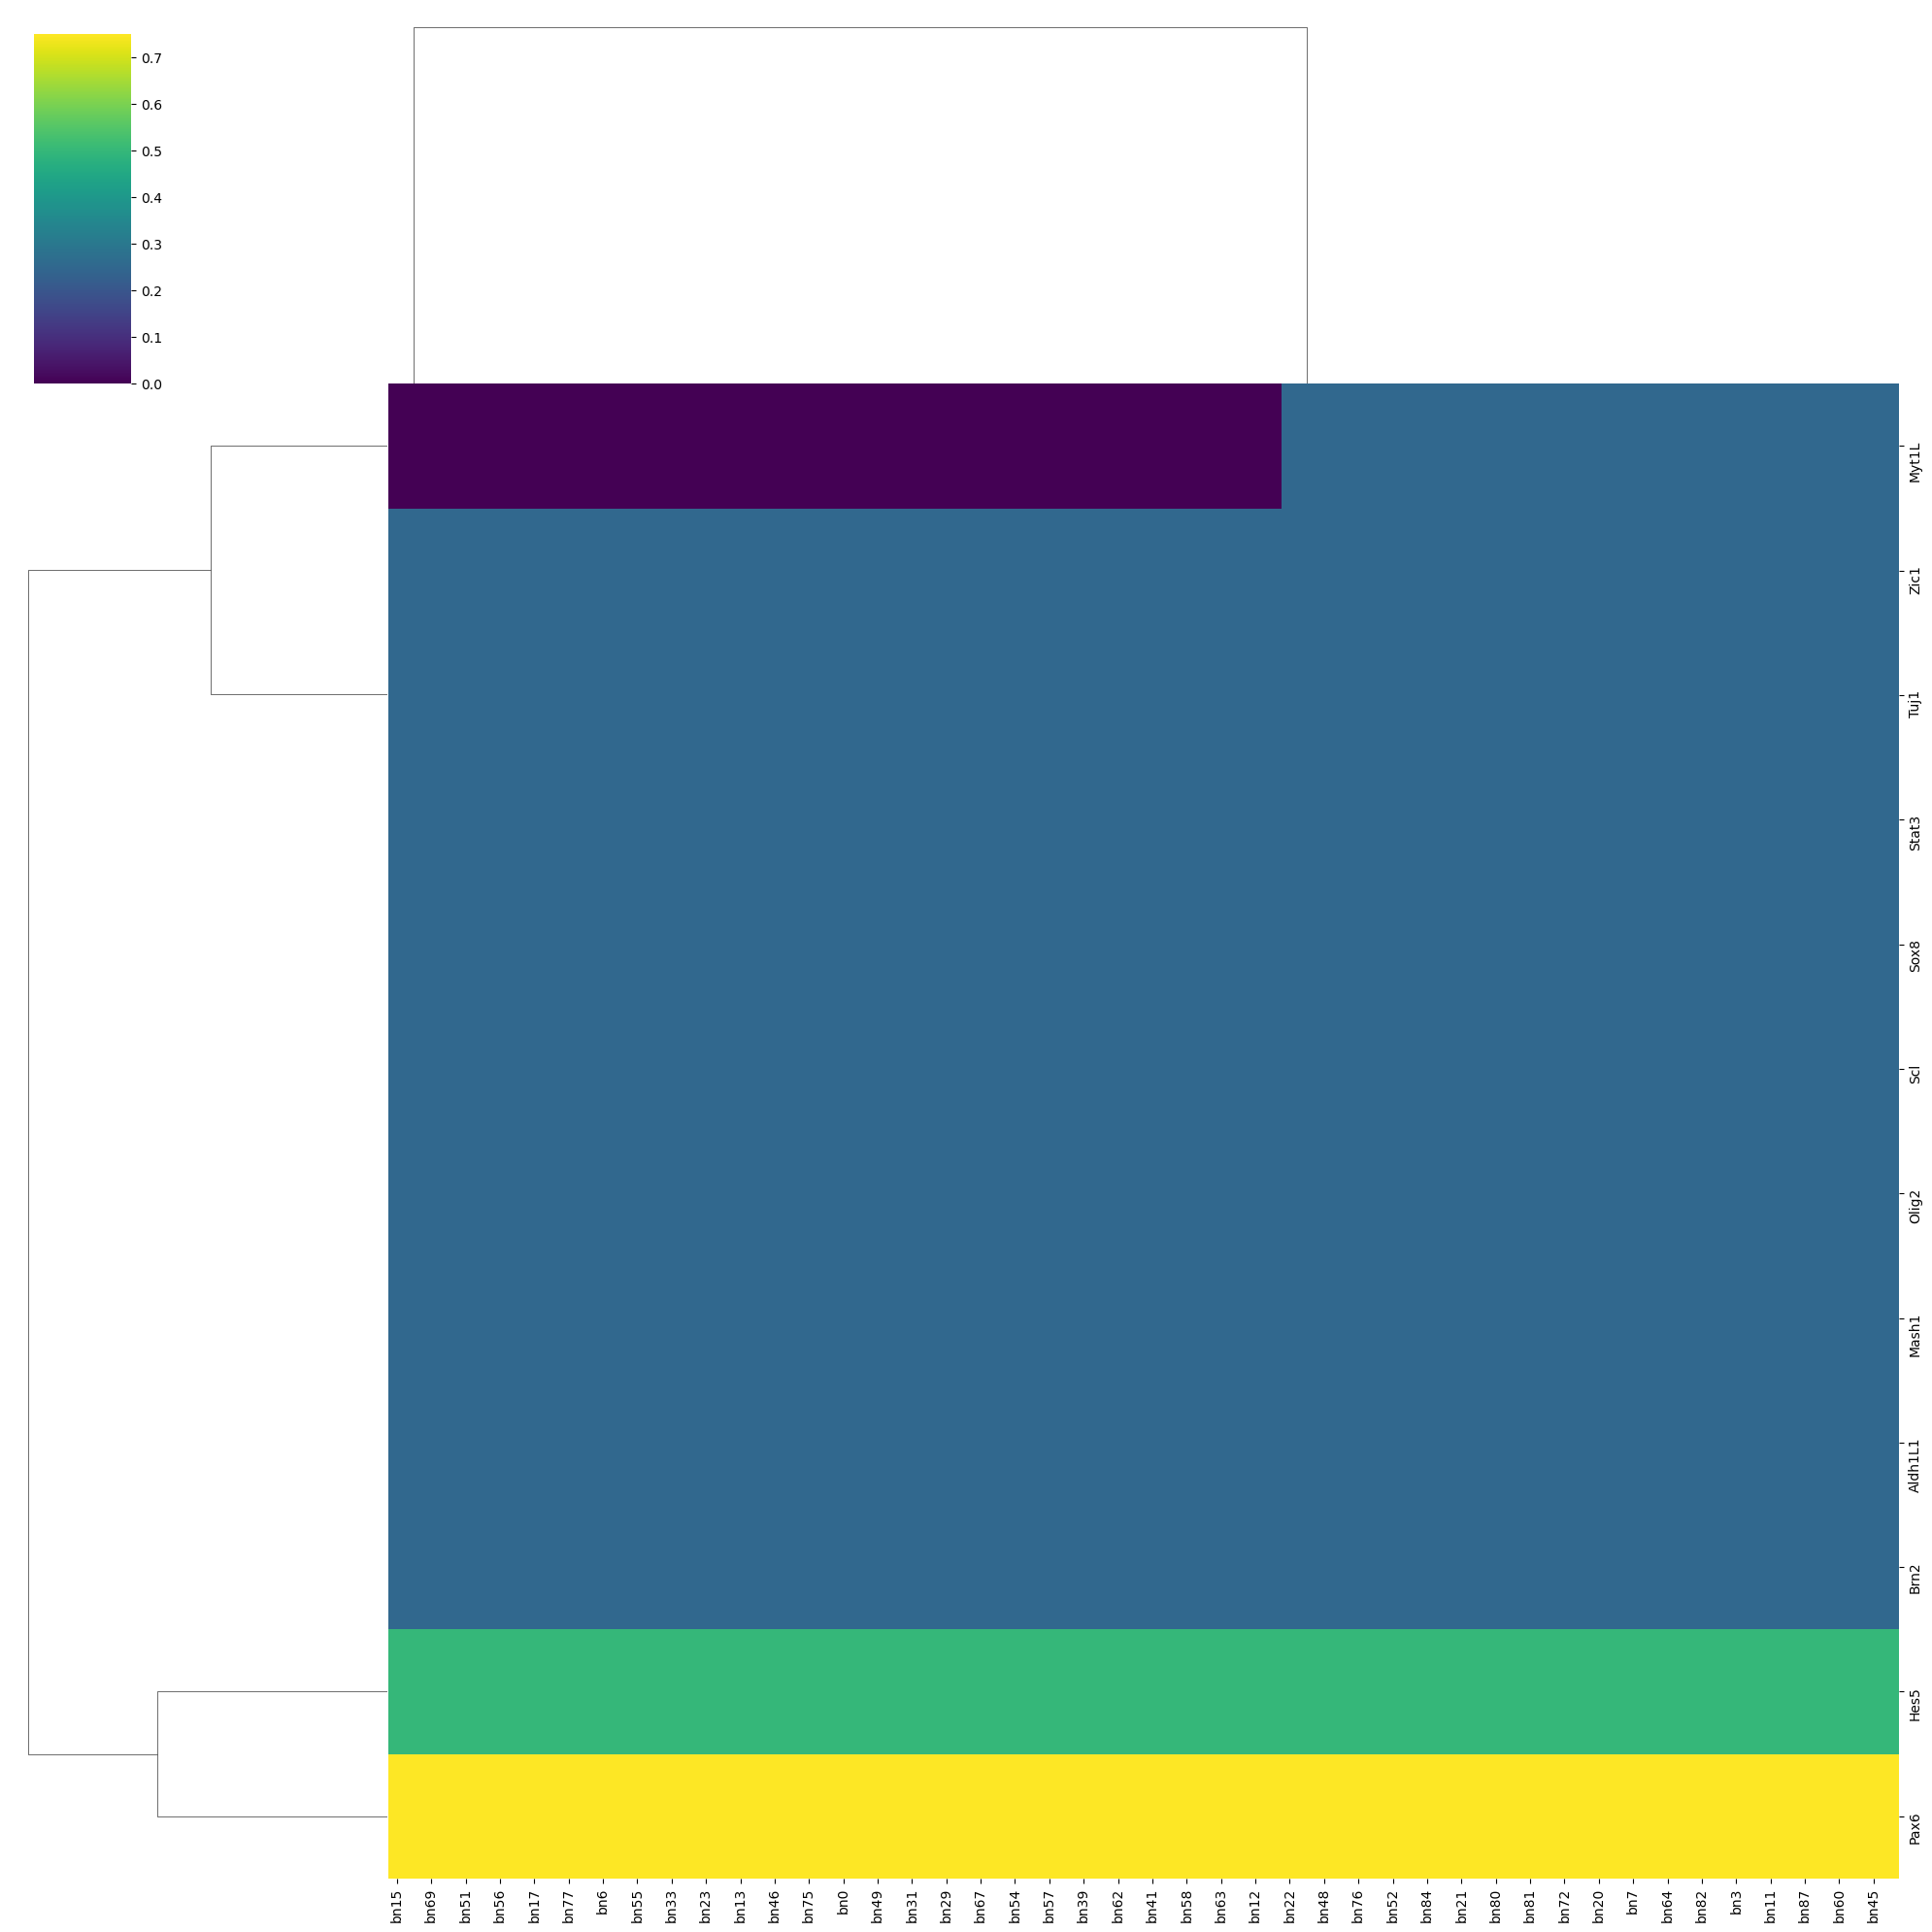

In [5]:
import seaborn as sns

sns.clustermap(model_logic.fillna(0), cmap='viridis', figsize=(20, 20))

2. Sequence of values

In this part of the script, we do not average the value of the attractors but convert them into seqeunce of string and assigned binary value of have or do not have certain attractors.

In [2]:
# Define function to process each model file
def process_model_file(file):
    
    # Load the model
    bn = BooleanNetwork.load(file)
    a = boolsim.attractors(bn, update_mode='asynchronous')

    # Make sure a has all the columns based on the model
    for i in range(len(a)):
        for key in bn.keys():
            if key not in a[i]:
                a[i][key] = 0
        a[i] = {k: a[i][k] for k in bn.keys()}

    # Convert each dictionary in the list to a string of binary values
    binary_strings = [''.join(str(value) for value in attractor.values()) for attractor in a]
    attractors = pd.DataFrame([binary_strings],columns=binary_strings)
    attractors[:]=1
    attractors.index = [file.replace('.bnet', '')]

    # Return the attractors list
    return attractors.T

In [3]:
models_path = '/home/spankaew/Git/BooleanBenchmark/models/dev/synthetic_random_diff/'

# Define models path
os.chdir(models_path)
model_files = os.listdir(models_path)
model_logic = pd.DataFrame()

# protect the entry point
if __name__ == '__main__':
    # Load models
    # Process all model files in parallel with limited number of cores
    num_cores = 10  # specify the number of cores you want to use
    with Pool(processes=num_cores) as pool:
        results = list(tqdm(pool.imap(process_model_file, model_files), total=len(model_files)))

    # Concatenate results into a single DataFrame
    print('Concatenate results into matrix')
    for model in tqdm(results):
        model_logic = pd.concat([model_logic, model], axis=1, ignore_index=False)

100%|██████████| 1000/1000 [00:14<00:00, 68.45it/s]


Concatenate results into matrix


100%|██████████| 1000/1000 [00:04<00:00, 237.55it/s]


/home/spankaew/anaconda3/envs/network_analysis/lib/python3.10/site-packages/seaborn/matrix.py:615: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, max_dependent_coord * 1.05)
/home/spankaew/anaconda3/envs/network_analysis/lib/python3.10/site-packages/seaborn/matrix.py:623: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, max_dependent_coord * 1.05)


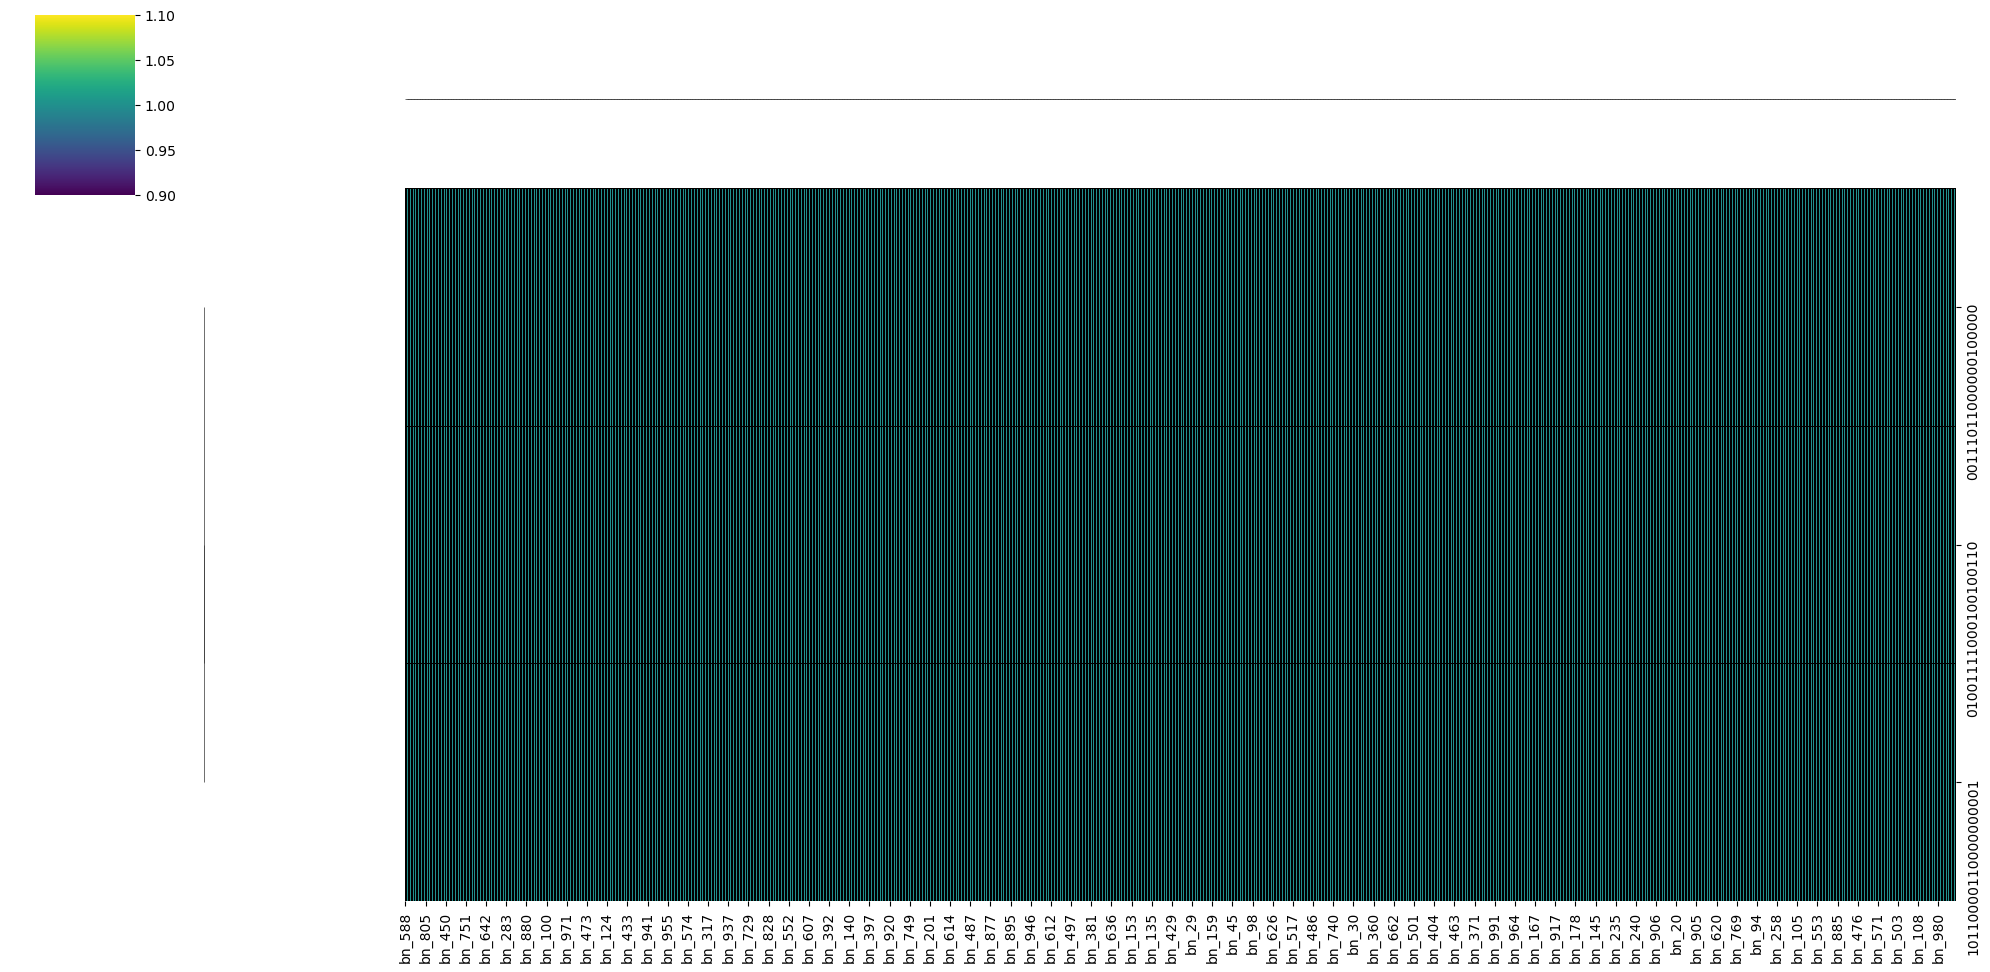

In [4]:
import seaborn as sns
sns.clustermap(model_logic.fillna(0), cmap='viridis', figsize=(20, 10), linewidths=.5, linecolor='black')

# Testing space


In [5]:
# Define function to process each model file
def process_model_file(file):
    bn = BooleanNetwork.load(file)
    a = boolsim.attractors(bn, update_mode='asynchronous')
    model = tabulate(a).mean()
    return model

In [9]:
models_path = '/home/spankaew/Git/BooleanBenchmark/models/dev/synthetic_random_diff/'
bn = BooleanNetwork.load(models_path + 'bn_17.bnet')
a = boolsim.attractors(bn, update_mode='asynchronous')
model = tabulate(a)

# Sort columns based on the list of bn.keys()
sorted_columns = list(bn.keys())
model = model.reindex(columns=sorted_columns, fill_value=0)
model

,x0,x1,x10,x11,x12,x13,x14,x15,x17,x2,x20,x21,x23,x24,x26,x3,x4,x6,x8,x9
2,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
0,0,1,0,0,1,1,1,1,0,0,0,1,0,0,1,0,0,1,1,0
1,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1


In [10]:
for i in range(len(a)):
    for key in bn.keys():
        if key not in a[i]:
            a[i][key] = 0
    a[i] = {k: a[i][k] for k in bn.keys()}

In [5]:
models_path = '/home/spankaew/Git/BooleanBenchmark/models/dev/synthetic_random_diff/'
bn2 = BooleanNetwork.load(models_path + 'bn_18.bnet')
a2 = boolsim.attractors(bn2, update_mode='asynchronous',)
model2 = tabulate(a2)
model2

,x0,x1,x10,x11,x12,x13,x14,x15,x17,x2,x20,x21,x23,x24,x26,x3,x4,x6,x8,x9
2,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
0,0,1,0,0,1,1,1,1,0,0,0,1,0,0,1,0,0,1,1,0
1,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
